# ANÁLISIS DE DATOS: Jovenes y usos de la tecnología en el año 2014

Relación de datos de jovenes entre 15 y 29 años, sexo, comuna en la que habita, acceso a internet, acceso a computadora personal, servicio de telefonia celular, videjuegos y otras cosas mas. El dataset puede descargarse de  https://www.buenosaires.gob.ar/bajoven/investigacion-y-documentacion/encuestas. 

### Librerias a usar:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura del dataset

In [2]:
df = pd.read_csv("encuesta-joven-2014-acceso-a-tecnologias-y-usos-digitales.csv")
df

,ID;AÑO;NT1_1;NT1_2;NT1_3;NT1_4;NT2_1;NT2_2;NT2_3;NT2_4;NT2_5;NT3;NT3_1;NT3_2;NT3_3;NT4_1;NT4_2;NT4_3;NT5_1;NT5_2;NT5_3;NT5_4;NT5_5;NT5_6;NT5_7;NT5_8;NT5_9;NT5_10;NT5_11;NT5_12;EDAD;SEXO;GRUPO_DE_EDAD;ZONA;PONDERA
0,199;2014;2;1;1;1;2;2;1;2;1;1;1;2;8;2;17;15;1;2...
1,1;2014;2;1;1;2;2;2;1;2;1;1;1;2;8;4;2;1;2;3;4;5...
2,5;2014;2;1;1;2;2;2;1;2;1;1;1;8;4;1;17;2;3;4;6;...
3,7;2014;1;1;1;1;2;2;1;1;1;1;1;8;4;2;1; ;2;4;5;6...
4,9;2014;1;2;1;1;1;2;1;1;2;1;1;4;8;2;1;6;3;4;5;6...
...,...
781,770;2014;2;1;1;1;1;2;1;2;2;1;1;8; ;2;5;1;3;4;5...
782,779;2014;1;1;1;1;2;2;1;1;1;1;1;8; ;2;5;6;3;4;5...
783,788;2014;1;2;1;1;1;2;1;1;2;1;1;8; ;1;2;3;2;3;4...
784,794;2014;1;1;1;1;1;2;1;1;1;1;6; ; ;99; ; ;2;4;...


## Limpieza  del dataset

In [3]:
columnas = df.columns.str.split(";")
col = []
for i in columnas:
    for j in i:
        col.append(j)

df.columns = ["hola"]    
        
for i in range(0, len(columnas[0])):
    df[f"{columnas[0][i]}"] = df["hola"].str.split(';').apply(pd.Series)[i]
       
df.head()


,hola,ID,AÑO,NT1_1,NT1_2,NT1_3,NT1_4,NT2_1,NT2_2,NT2_3,...,NT5_8,NT5_9,NT5_10,NT5_11,NT5_12,EDAD,SEXO,GRUPO_DE_EDAD,ZONA,PONDERA
0,199;2014;2;1;1;1;2;2;1;2;1;1;1;2;8;2;17;15;1;2...,199,2014,2,1,1,1,2,2,1,...,10,12,14,,,28,1,3,1,1484.53991849579
1,1;2014;2;1;1;2;2;2;1;2;1;1;1;2;8;4;2;1;2;3;4;5...,1,2014,2,1,1,2,2,2,1,...,11,14,15,,,26,1,3,1,237.865864135882
2,5;2014;2;1;1;2;2;2;1;2;1;1;1;8;4;1;17;2;3;4;6;...,5,2014,2,1,1,2,2,2,1,...,14,15,,,,28,1,3,1,237.865864135882
3,7;2014;1;1;1;1;2;2;1;1;1;1;1;8;4;2;1; ;2;4;5;6...,7,2014,1,1,1,1,2,2,1,...,10,11,12,14,,25,1,3,1,471.06769172008
4,9;2014;1;2;1;1;1;2;1;1;2;1;1;4;8;2;1;6;3;4;5;6...,9,2014,1,2,1,1,1,2,1,...,12,14,15,,,27,1,3,1,471.06769172008


In [4]:
df.drop("hola", axis=1, inplace=True)
df.head()
    

,ID,AÑO,NT1_1,NT1_2,NT1_3,NT1_4,NT2_1,NT2_2,NT2_3,NT2_4,...,NT5_8,NT5_9,NT5_10,NT5_11,NT5_12,EDAD,SEXO,GRUPO_DE_EDAD,ZONA,PONDERA
0,199,2014,2,1,1,1,2,2,1,2,...,10,12,14,,,28,1,3,1,1484.53991849579
1,1,2014,2,1,1,2,2,2,1,2,...,11,14,15,,,26,1,3,1,237.865864135882
2,5,2014,2,1,1,2,2,2,1,2,...,14,15,,,,28,1,3,1,237.865864135882
3,7,2014,1,1,1,1,2,2,1,1,...,10,11,12,14,,25,1,3,1,471.06769172008
4,9,2014,1,2,1,1,1,2,1,1,...,12,14,15,,,27,1,3,1,471.06769172008


In [5]:
df.rename(columns = {
    "NT1_1": "PC_escritorio_casa",
    "NT1_2": "PC_portatil_casa",
    "NT1_3": "Tiene_internet",
    "NT1_4": "Videojuego",
    "NT2_1": "MP3",
    "NT2_2": "Celular_sin_internet",
    "NT2_3": "Celular_con_internet",
    "NT2_4": "PC_escritorio_personal",
    "NT2_5": "PC_portatil_personal",
    "NT3": "Usa_internet",
    "NT3_1": "Lugar_acceso_a_internet_1",
    "NT3_2": "Lugar_acceso_a_internet_2",
    "NT3_3": "Lugar_acceso_a_internet_3",
    "NT4_1": "Paginas_visitadas_1",
    "NT4_2": "Paginas_visitadas_2",
    "NT4_3": "Paginas_visitadas_3",
    "NT5_1": "Actividad_en_internet_1",
    "NT5_2": "Actividad_en_internet_2",
    "NT5_3": "Actividad_en_internet_3",
    "NT5_4": "Actividad_en_internet_4",
    "NT5_5": "Actividad_en_internet_5",
    "NT5_6": "Actividad_en_internet_6",
    "NT5_7": "Actividad_en_internet_7",
    "NT5_8": "Actividad_en_internet_8",
    "NT5_9": "Actividad_en_internet_9",
    "NT5_10": "Actividad_en_internet_10",
    "NT5_11": "Actividad_en_internet_11",
    "NT5_12": "Actividad_en_internet_12"}, inplace=True)

df.head()

,ID,AÑO,PC_escritorio_casa,PC_portatil_casa,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,...,Actividad_en_internet_8,Actividad_en_internet_9,Actividad_en_internet_10,Actividad_en_internet_11,Actividad_en_internet_12,EDAD,SEXO,GRUPO_DE_EDAD,ZONA,PONDERA
0,199,2014,2,1,1,1,2,2,1,2,...,10,12,14,,,28,1,3,1,1484.53991849579
1,1,2014,2,1,1,2,2,2,1,2,...,11,14,15,,,26,1,3,1,237.865864135882
2,5,2014,2,1,1,2,2,2,1,2,...,14,15,,,,28,1,3,1,237.865864135882
3,7,2014,1,1,1,1,2,2,1,1,...,10,11,12,14,,25,1,3,1,471.06769172008
4,9,2014,1,2,1,1,1,2,1,1,...,12,14,15,,,27,1,3,1,471.06769172008


In [6]:
df.info()
# Vemos que no hay valores nulos. Pero esto es un error, ya que estos valores nulos existen pero al estar
# ingresados en el dataset como strings vacios " ", no los identifica:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         786 non-null    object
 1   AÑO                        786 non-null    object
 2   PC_escritorio_casa         786 non-null    object
 3   PC_portatil_casa           786 non-null    object
 4   Tiene_internet             786 non-null    object
 5   Videojuego                 786 non-null    object
 6   MP3                        786 non-null    object
 7   Celular_sin_internet       786 non-null    object
 8   Celular_con_internet       786 non-null    object
 9   PC_escritorio_personal     786 non-null    object
 10  PC_portatil_personal       786 non-null    object
 11  Usa_internet               786 non-null    object
 12  Lugar_acceso_a_internet_1  786 non-null    object
 13  Lugar_acceso_a_internet_2  786 non-null    object
 14  Lugar_acce

In [7]:
df[df == 99] = " "
df[df == 9] = " "
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()
# Vemos que ahora los espacios en blanco fueron completados con NaN --> permite un mejor manejo futuro
# de los values del dataset

,ID,AÑO,PC_escritorio_casa,PC_portatil_casa,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,...,Actividad_en_internet_8,Actividad_en_internet_9,Actividad_en_internet_10,Actividad_en_internet_11,Actividad_en_internet_12,EDAD,SEXO,GRUPO_DE_EDAD,ZONA,PONDERA
0,199,2014,2,1,1,1,2,2,1,2,...,10,12,14,NaN,NaN,28,1,3,1,1484.53991849579
1,1,2014,2,1,1,2,2,2,1,2,...,11,14,15,NaN,NaN,26,1,3,1,237.865864135882
2,5,2014,2,1,1,2,2,2,1,2,...,14,15,NaN,NaN,NaN,28,1,3,1,237.865864135882
3,7,2014,1,1,1,1,2,2,1,1,...,10,11,12,14,NaN,25,1,3,1,471.06769172008
4,9,2014,1,2,1,1,1,2,1,1,...,12,14,15,NaN,NaN,27,1,3,1,471.06769172008


In [8]:
# Ahora convierto los values de todo el dataframe a tipo flotante
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         786 non-null    int64  
 1   AÑO                        786 non-null    int64  
 2   PC_escritorio_casa         786 non-null    int64  
 3   PC_portatil_casa           786 non-null    int64  
 4   Tiene_internet             786 non-null    int64  
 5   Videojuego                 786 non-null    int64  
 6   MP3                        786 non-null    int64  
 7   Celular_sin_internet       786 non-null    int64  
 8   Celular_con_internet       786 non-null    int64  
 9   PC_escritorio_personal     786 non-null    int64  
 10  PC_portatil_personal       786 non-null    int64  
 11  Usa_internet               786 non-null    int64  
 12  Lugar_acceso_a_internet_1  764 non-null    float64
 13  Lugar_acceso_a_internet_2  534 non-null    float64

In [9]:
df["EDAD"].unique()

array([28, 26, 25, 27, 19, 20, 23, 24, 29, 16, 17, 22, 18, 21, 15],
      dtype=int64)

## Análisis general:
Se busca determinar la relacion existente entre:
Features:
    - EDAD
    - SEXO
    - GRUPO DE EDAD
    - ZONA
    - PC_escritorio_casa
    - PC_portatil_casa
    - Tiene_internet            
    - Videojuego                 
    - MP3                        
    - Celular_sin_internet       
    - Celular_con_internet       
    - PC_escritorio_personal     
    - PC_portatil_personal        
    - Usa_internet                
    - Lugar_acceso_a_internet_1  
    - Lugar_acceso_a_internet_2  
    - Lugar_acceso_a_internet_3  
   
Target:
    - Paginas_visitadas_1        
    - Paginas_visitadas_2
    - Paginas_visitadas_3
    - Actividad_en_internet_1
    - Actividad_en_internet_2
    - Actividad_en_internet_3
    - Actividad_en_internet_4
    - Actividad_en_internet_5
    - Actividad_en_internet_6
    - Actividad_en_internet_7
    - Actividad_en_internet_8
    - Actividad_en_internet_9
    - Actividad_en_internet_10
    - Actividad_en_internet_11
    - Actividad_en_internet_12

In [10]:
df = df.drop(["Actividad_en_internet_4",
    "Actividad_en_internet_5",
    "Actividad_en_internet_6",
    "Actividad_en_internet_7",
    "Actividad_en_internet_8",
    "Actividad_en_internet_9",
    "Actividad_en_internet_10",
    "Actividad_en_internet_11",
    "Actividad_en_internet_12",
    "Lugar_acceso_a_internet_2",
    "Lugar_acceso_a_internet_3"], axis=1)



df

,ID,AÑO,PC_escritorio_casa,PC_portatil_casa,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,...,Paginas_visitadas_2,Paginas_visitadas_3,Actividad_en_internet_1,Actividad_en_internet_2,Actividad_en_internet_3,EDAD,SEXO,GRUPO_DE_EDAD,ZONA,PONDERA
0,199,2014,2,1,1,1,2,2,1,2,...,17.0,15.0,1.0,2.0,3.0,28,1,3,1,1484.539918
1,1,2014,2,1,1,2,2,2,1,2,...,2.0,1.0,2.0,3.0,4.0,26,1,3,1,237.865864
2,5,2014,2,1,1,2,2,2,1,2,...,17.0,2.0,3.0,4.0,6.0,28,1,3,1,237.865864
3,7,2014,1,1,1,1,2,2,1,1,...,1.0,NaN,2.0,4.0,5.0,25,1,3,1,471.067692
4,9,2014,1,2,1,1,1,2,1,1,...,1.0,6.0,3.0,4.0,5.0,27,1,3,1,471.067692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,770,2014,2,1,1,1,1,2,1,2,...,5.0,1.0,3.0,4.0,5.0,15,2,1,3,447.257502
782,779,2014,1,1,1,1,2,2,1,1,...,5.0,6.0,3.0,4.0,5.0,18,2,1,3,349.134683
783,788,2014,1,2,1,1,1,2,1,1,...,2.0,3.0,2.0,3.0,4.0,20,2,2,3,481.443381
784,794,2014,1,1,1,1,1,2,1,1,...,NaN,NaN,2.0,4.0,5.0,17,2,1,3,385.075018


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         786 non-null    int64  
 1   AÑO                        786 non-null    int64  
 2   PC_escritorio_casa         786 non-null    int64  
 3   PC_portatil_casa           786 non-null    int64  
 4   Tiene_internet             786 non-null    int64  
 5   Videojuego                 786 non-null    int64  
 6   MP3                        786 non-null    int64  
 7   Celular_sin_internet       786 non-null    int64  
 8   Celular_con_internet       786 non-null    int64  
 9   PC_escritorio_personal     786 non-null    int64  
 10  PC_portatil_personal       786 non-null    int64  
 11  Usa_internet               786 non-null    int64  
 12  Lugar_acceso_a_internet_1  764 non-null    float64
 13  Paginas_visitadas_1        764 non-null    float64

In [12]:
# Creamos un rango de edades

df["Rango_edad"] = pd.cut(df["EDAD"], 4)
df.head(15)

,ID,AÑO,PC_escritorio_casa,PC_portatil_casa,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,...,Paginas_visitadas_3,Actividad_en_internet_1,Actividad_en_internet_2,Actividad_en_internet_3,EDAD,SEXO,GRUPO_DE_EDAD,ZONA,PONDERA,Rango_edad
0,199,2014,2,1,1,1,2,2,1,2,...,15.0,1.0,2.0,3.0,28,1,3,1,1484.539918,"(25.5, 29.0]"
1,1,2014,2,1,1,2,2,2,1,2,...,1.0,2.0,3.0,4.0,26,1,3,1,237.865864,"(25.5, 29.0]"
2,5,2014,2,1,1,2,2,2,1,2,...,2.0,3.0,4.0,6.0,28,1,3,1,237.865864,"(25.5, 29.0]"
3,7,2014,1,1,1,1,2,2,1,1,...,NaN,2.0,4.0,5.0,25,1,3,1,471.067692,"(22.0, 25.5]"
4,9,2014,1,2,1,1,1,2,1,1,...,6.0,3.0,4.0,5.0,27,1,3,1,471.067692,"(25.5, 29.0]"
5,11,2014,1,1,1,1,1,2,1,1,...,NaN,1.0,2.0,3.0,19,1,1,1,350.305191,"(18.5, 22.0]"
6,16,2014,1,1,1,2,1,2,1,1,...,6.0,1.0,2.0,3.0,20,1,2,1,744.479115,"(18.5, 22.0]"
7,17,2014,1,2,1,2,2,2,1,1,...,NaN,2.0,3.0,4.0,23,1,2,1,744.479115,"(22.0, 25.5]"
8,20,2014,1,1,1,1,2,2,1,1,...,8.0,2.0,3.0,4.0,24,1,2,1,744.479115,"(22.0, 25.5]"
9,23,2014,2,1,1,1,2,2,1,2,...,NaN,1.0,2.0,3.0,29,1,3,1,792.886214,"(25.5, 29.0]"


In [13]:
df.loc[df["EDAD"] <= 18, "EDAD"] = 1
df.loc[(df["EDAD"] > 18) & (df["EDAD"] <= 22), "EDAD"] = 2
df.loc[(df["EDAD"] > 22) & (df["EDAD"] <= 26), "EDAD"] = 3
df.loc[df["EDAD"] > 26, "EDAD"] = 4

df = df.drop(["GRUPO_DE_EDAD", "PONDERA", "Rango_edad", "AÑO", "ID"], axis=1)
df.head(12)

,PC_escritorio_casa,PC_portatil_casa,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,PC_portatil_personal,Usa_internet,Lugar_acceso_a_internet_1,Paginas_visitadas_1,Paginas_visitadas_2,Paginas_visitadas_3,Actividad_en_internet_1,Actividad_en_internet_2,Actividad_en_internet_3,EDAD,SEXO,ZONA
0,2,1,1,1,2,2,1,2,1,1,1.0,2.0,17.0,15.0,1.0,2.0,3.0,4,1,1
1,2,1,1,2,2,2,1,2,1,1,1.0,4.0,2.0,1.0,2.0,3.0,4.0,3,1,1
2,2,1,1,2,2,2,1,2,1,1,1.0,1.0,17.0,2.0,3.0,4.0,6.0,4,1,1
3,1,1,1,1,2,2,1,1,1,1,1.0,2.0,1.0,NaN,2.0,4.0,5.0,3,1,1
4,1,2,1,1,1,2,1,1,2,1,1.0,2.0,1.0,6.0,3.0,4.0,5.0,4,1,1
5,1,1,1,1,1,2,1,1,2,1,1.0,1.0,3.0,NaN,1.0,2.0,3.0,2,1,1
6,1,1,1,2,1,2,1,1,1,1,1.0,18.0,1.0,6.0,1.0,2.0,3.0,2,1,1
7,1,2,1,2,2,2,1,1,2,1,1.0,2.0,NaN,NaN,2.0,3.0,4.0,3,1,1
8,1,1,1,1,2,2,1,1,1,1,1.0,9.0,2.0,8.0,2.0,3.0,4.0,3,1,1
9,2,1,1,1,2,2,1,2,1,1,1.0,5.0,2.0,NaN,1.0,2.0,3.0,4,1,1


In [14]:
# Discriminacion en acceso a computadora de cualquier tipo en la casa:
df['Acceso_a_PC'] = df.apply(lambda row: row.PC_escritorio_casa + row.PC_portatil_casa, axis=1)
for i in range(0,len(df["Acceso_a_PC"])):
    if df["Acceso_a_PC"][i] == 2:
        df["Acceso_a_PC"][i] = 1
    if df["Acceso_a_PC"][i] == 3:
        df["Acceso_a_PC"][i] = 2
    if df["Acceso_a_PC"][i] == 4:
        df["Acceso_a_PC"][i] = 3
        

df.head()   
# Vemos que aquellos que tengan tanto PC_Escritorio como PC_portatil tiene un Acceso_a_PC igual a 1, mientras
# que aquiellos que solo tienen uno de los dos equipos, tienen un Acceso_a_PC igual a 2. Aquiellos que no
# tienen acceso nada les corresponde el valor 3

C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,PC_escritorio_casa,PC_portatil_casa,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,PC_portatil_personal,Usa_internet,...,Paginas_visitadas_1,Paginas_visitadas_2,Paginas_visitadas_3,Actividad_en_internet_1,Actividad_en_internet_2,Actividad_en_internet_3,EDAD,SEXO,ZONA,Acceso_a_PC
0,2,1,1,1,2,2,1,2,1,1,...,2.0,17.0,15.0,1.0,2.0,3.0,4,1,1,2.0
1,2,1,1,2,2,2,1,2,1,1,...,4.0,2.0,1.0,2.0,3.0,4.0,3,1,1,2.0
2,2,1,1,2,2,2,1,2,1,1,...,1.0,17.0,2.0,3.0,4.0,6.0,4,1,1,2.0
3,1,1,1,1,2,2,1,1,1,1,...,2.0,1.0,NaN,2.0,4.0,5.0,3,1,1,1.0
4,1,2,1,1,1,2,1,1,2,1,...,2.0,1.0,6.0,3.0,4.0,5.0,4,1,1,2.0


In [15]:
df = df.drop(["PC_escritorio_casa", "PC_portatil_casa"], axis=1)
df.head()

,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,PC_portatil_personal,Usa_internet,Lugar_acceso_a_internet_1,Paginas_visitadas_1,Paginas_visitadas_2,Paginas_visitadas_3,Actividad_en_internet_1,Actividad_en_internet_2,Actividad_en_internet_3,EDAD,SEXO,ZONA,Acceso_a_PC
0,1,1,2,2,1,2,1,1,1.0,2.0,17.0,15.0,1.0,2.0,3.0,4,1,1,2.0
1,1,2,2,2,1,2,1,1,1.0,4.0,2.0,1.0,2.0,3.0,4.0,3,1,1,2.0
2,1,2,2,2,1,2,1,1,1.0,1.0,17.0,2.0,3.0,4.0,6.0,4,1,1,2.0
3,1,1,2,2,1,1,1,1,1.0,2.0,1.0,NaN,2.0,4.0,5.0,3,1,1,1.0
4,1,1,1,2,1,1,2,1,1.0,2.0,1.0,6.0,3.0,4.0,5.0,4,1,1,2.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiene_internet             786 non-null    int64  
 1   Videojuego                 786 non-null    int64  
 2   MP3                        786 non-null    int64  
 3   Celular_sin_internet       786 non-null    int64  
 4   Celular_con_internet       786 non-null    int64  
 5   PC_escritorio_personal     786 non-null    int64  
 6   PC_portatil_personal       786 non-null    int64  
 7   Usa_internet               786 non-null    int64  
 8   Lugar_acceso_a_internet_1  764 non-null    float64
 9   Paginas_visitadas_1        764 non-null    float64
 10  Paginas_visitadas_2        709 non-null    float64
 11  Paginas_visitadas_3        576 non-null    float64
 12  Actividad_en_internet_1    764 non-null    float64
 13  Actividad_en_internet_2    691 non-null    float64

In [17]:
df.loc[df["Lugar_acceso_a_internet_1"] == 1, "Lugar_acceso_a_internet_1"] = 1
df.loc[(df["Lugar_acceso_a_internet_1"] > 1) & (df["Lugar_acceso_a_internet_1"] <= 3), "Lugar_acceso_a_internet_1"] = 2
df.loc[(df["Lugar_acceso_a_internet_1"] > 3) & (df["Lugar_acceso_a_internet_1"] <= 6), "Lugar_acceso_a_internet_1"] = 3
df.loc[(df["Lugar_acceso_a_internet_1"] > 6) & (df["Lugar_acceso_a_internet_1"] <= 26), "Lugar_acceso_a_internet_1"] = 4

#Vemos que si:
    #Accede desde la casa: 1 (acceso libre en todo momento)
    # Accede desde el trabajo o un cyber: 2 (no tiene en la casa pero tiene recursos para acceder)
    # Accede desde casa de otro o universidad: 3 (no tiene en la casa y tampoco tiene recursos)
    # Accede desde cualquier otro lugar publico: 4 (no tiene casa recursos ni gente que tenga)

df.head(12)

,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,PC_portatil_personal,Usa_internet,Lugar_acceso_a_internet_1,Paginas_visitadas_1,Paginas_visitadas_2,Paginas_visitadas_3,Actividad_en_internet_1,Actividad_en_internet_2,Actividad_en_internet_3,EDAD,SEXO,ZONA,Acceso_a_PC
0,1,1,2,2,1,2,1,1,1.0,2.0,17.0,15.0,1.0,2.0,3.0,4,1,1,2.0
1,1,2,2,2,1,2,1,1,1.0,4.0,2.0,1.0,2.0,3.0,4.0,3,1,1,2.0
2,1,2,2,2,1,2,1,1,1.0,1.0,17.0,2.0,3.0,4.0,6.0,4,1,1,2.0
3,1,1,2,2,1,1,1,1,1.0,2.0,1.0,NaN,2.0,4.0,5.0,3,1,1,1.0
4,1,1,1,2,1,1,2,1,1.0,2.0,1.0,6.0,3.0,4.0,5.0,4,1,1,2.0
5,1,1,1,2,1,1,2,1,1.0,1.0,3.0,NaN,1.0,2.0,3.0,2,1,1,1.0
6,1,2,1,2,1,1,1,1,1.0,18.0,1.0,6.0,1.0,2.0,3.0,2,1,1,1.0
7,1,2,2,2,1,1,2,1,1.0,2.0,NaN,NaN,2.0,3.0,4.0,3,1,1,2.0
8,1,1,2,2,1,1,1,1,1.0,9.0,2.0,8.0,2.0,3.0,4.0,3,1,1,1.0
9,1,1,2,2,1,2,1,1,1.0,5.0,2.0,NaN,1.0,2.0,3.0,4,1,1,2.0


In [18]:
pocentaje_sin_acceso_a_internet = len(df.loc[df["Tiene_internet"] == 2])/len(df)
pocentaje_sin_acceso_a_internet

0.1183206106870229

#### Aqui completamos aquellas columnas con missing values con valores promedios en funcion de otras variables

In [19]:
combinaciones = np.zeros((3,4))

# Completo Paginas_visitadas_1 en funcion de EDAD(pclass) y SEXO(sex)

for feature in ["Paginas_visitadas_1","Lugar_acceso_a_internet_1", "Paginas_visitadas_2", "Paginas_visitadas_3", "Actividad_en_internet_1","Actividad_en_internet_2","Actividad_en_internet_3"]:

    for i in range(1,3):
        for j in range(0,4):
            age1 = df[(df["SEXO"] == i) & (df["EDAD"] == j+1)][feature].dropna() 
            age_promedio = age1.median()
            combinaciones[i,j] = int(age_promedio/0.5 + 0.5 ) * 0.5

    for i in range(1,3):
        for j in range(0,4):
            df.loc[(df[feature].isnull()) & (df["SEXO"] == i) & (df["EDAD"] == j+1),\
                    feature] = combinaciones[i,j]

    df[feature] = df[feature].astype(int)

df.head(12)

,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,PC_portatil_personal,Usa_internet,Lugar_acceso_a_internet_1,Paginas_visitadas_1,Paginas_visitadas_2,Paginas_visitadas_3,Actividad_en_internet_1,Actividad_en_internet_2,Actividad_en_internet_3,EDAD,SEXO,ZONA,Acceso_a_PC
0,1,1,2,2,1,2,1,1,1,2,17,15,1,2,3,4,1,1,2.0
1,1,2,2,2,1,2,1,1,1,4,2,1,2,3,4,3,1,1,2.0
2,1,2,2,2,1,2,1,1,1,1,17,2,3,4,6,4,1,1,2.0
3,1,1,2,2,1,1,1,1,1,2,1,4,2,4,5,3,1,1,1.0
4,1,1,1,2,1,1,2,1,1,2,1,6,3,4,5,4,1,1,2.0
5,1,1,1,2,1,1,2,1,1,1,3,5,1,2,3,2,1,1,1.0
6,1,2,1,2,1,1,1,1,1,18,1,6,1,2,3,2,1,1,1.0
7,1,2,2,2,1,1,2,1,1,2,2,4,2,3,4,3,1,1,2.0
8,1,1,2,2,1,1,1,1,1,9,2,8,2,3,4,3,1,1,1.0
9,1,1,2,2,1,2,1,1,1,5,2,5,1,2,3,4,1,1,2.0


In [20]:
df.info() #Vemos que el DatFrame ya no presenta valores nulos ya que fueron completados segun
# valores promedios obtenidos de esa variable en funcion EDAD y SEXO.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiene_internet             786 non-null    int64  
 1   Videojuego                 786 non-null    int64  
 2   MP3                        786 non-null    int64  
 3   Celular_sin_internet       786 non-null    int64  
 4   Celular_con_internet       786 non-null    int64  
 5   PC_escritorio_personal     786 non-null    int64  
 6   PC_portatil_personal       786 non-null    int64  
 7   Usa_internet               786 non-null    int64  
 8   Lugar_acceso_a_internet_1  786 non-null    int32  
 9   Paginas_visitadas_1        786 non-null    int32  
 10  Paginas_visitadas_2        786 non-null    int32  
 11  Paginas_visitadas_3        786 non-null    int32  
 12  Actividad_en_internet_1    786 non-null    int32  
 13  Actividad_en_internet_2    786 non-null    int32  

In [21]:
df["Acceso_a_PC"] = df["Acceso_a_PC"].astype(int)

In [22]:
df['Acceso_a_PC_personal'] = df.apply(lambda row: row.PC_escritorio_personal + row.PC_portatil_personal, axis=1)
for i in range(0,len(df["Acceso_a_PC_personal"])):
    if df["Acceso_a_PC_personal"][i] == 2:
        df["Acceso_a_PC_personal"][i] = 1
    elif df["Acceso_a_PC_personal"][i] == 3:
        df["Acceso_a_PC_personal"][i] = 2
    elif df["Acceso_a_PC_personal"][i] == 4:
        df["Acceso_a_PC_personal"][i] = 3
        
df.head()   
# Si tienen pc personal y notebook personal : 1
# Si tienen alguna de las dos: 2
# Si no tienen ninguna de las dos: 3

C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Tiene_internet,Videojuego,MP3,Celular_sin_internet,Celular_con_internet,PC_escritorio_personal,PC_portatil_personal,Usa_internet,Lugar_acceso_a_internet_1,Paginas_visitadas_1,Paginas_visitadas_2,Paginas_visitadas_3,Actividad_en_internet_1,Actividad_en_internet_2,Actividad_en_internet_3,EDAD,SEXO,ZONA,Acceso_a_PC,Acceso_a_PC_personal
0,1,1,2,2,1,2,1,1,1,2,17,15,1,2,3,4,1,1,2,2
1,1,2,2,2,1,2,1,1,1,4,2,1,2,3,4,3,1,1,2,2
2,1,2,2,2,1,2,1,1,1,1,17,2,3,4,6,4,1,1,2,2
3,1,1,2,2,1,1,1,1,1,2,1,4,2,4,5,3,1,1,1,1
4,1,1,1,2,1,1,2,1,1,2,1,6,3,4,5,4,1,1,2,2


In [23]:
df = df.drop(["PC_escritorio_personal", "PC_portatil_personal"], axis=1)
df = df.drop(["MP3"], axis=1)

In [24]:
df.loc[(df["Paginas_visitadas_1"] <= 11), "Paginas_visitadas_1"] = 1 #redes sociales
df.loc[(df["Paginas_visitadas_1"] > 11), "Paginas_visitadas_1"] = 2 #noticias, blogs, etc.



## Reconocimiento de los valores de la muestra

In [25]:
acceso_a_pc = round(df['Acceso_a_PC'].value_counts(normalize=True) * 100,1)
print("----------------Acceso a PC en la casa---------------------------------------------")
print(f"El {acceso_a_pc[1]}% tiene una PC de escritorio y una portatil en la casa")
print(f"El {acceso_a_pc[2]}% solo una PC en la casa")
print("----------------Acceso a PC propia---------------------------------------------")

acceso_a_pc_personal = round(df['Acceso_a_PC_personal'].value_counts(normalize=True) * 100,1)
print(f"El {acceso_a_pc_personal[1]}% tiene una PC propia y una portatil propia")
print(f"El {acceso_a_pc_personal[2]}% tiene al menos una computadora propia, ya sea de escritorio o portatil")
print(f"El {acceso_a_pc_personal[3]}% no tiene ni PC de escritorio ni portatil")

sexo = round(df['SEXO'].value_counts(normalize=True) * 100,1)
print("----------------Sexo---------------------------------------------")
print(f"El {sexo[1]}% es varón")
print(f"El {sexo[2]}% es mujer")

      
edad = round(df['EDAD'].value_counts(normalize=True) * 100,1)
print("----------------Edad---------------------------------------------")
print(f"El {edad[1]}% tiene entre 15 y 18 años")
print(f"El {edad[2]}% tiene entre 18 y 22 años")
print(f"El {edad[3]}% tiene entre 22 y 26 años")
print(f"El {edad[4]}% tiene entre 26 y 29 años")

zona = round(df['ZONA'].value_counts(normalize=True) * 100,1)
print("----------------Edad---------------------------------------------")
print(f"El {zona[1]}% vive en zona norte (comunas 2,13,14)")
print(f"El {zona[2]}% vive en zona centro (comunas  1,  3,  5,  6,  7,  8,  11,  12  y  15)")
print(f"El {zona[3]}% vive en zona sur (comunas 4,8,9,10)")

internet = round(df['Tiene_internet'].value_counts(normalize=True) * 100,1)
print("----------------Internet---------------------------------------------")
print(f"El {internet[1]}% tiene internet")
print(f"El {internet[2]}% no tiene internet")

celular = round(df['Celular_con_internet'].value_counts(normalize=True) * 100,1)
print("----------------Celular---------------------------------------------")
print(f"El {celular[1]}% tiene celular con internet")
print(f"El {celular[2]}% no tiene celular con internet")

lugar = round(df['Lugar_acceso_a_internet_1'].value_counts(normalize=True) * 100,1)
print("----------------Lugar de acceso a internet---------------------------------------------")
print(f"El {lugar[1]}% accede a internet desde la casa")
print(f"El {lugar[2]}% accede a internet desde el trabajo o cyber")
print(f"El {lugar[3]}% accede a internet desde la casa de otro/universidad")
print(f"El {lugar[4]}% accede a internet desde cualquier otro lugar publico")

wenb = round(df['Paginas_visitadas_1'].value_counts(normalize=True) * 100,1)
print("----------------Paginas visitadas como primera opcion---------------------------------------------")
print(f"El {wenb[1]}% consume redes sociales como primera opcion")
print(f"El {wenb[2]}% consume noticias y blogs como primera opcion")


consola = round(df['Videojuego'].value_counts(normalize=True) * 100,1)
print("----------------Paginas visitadas como primera opcion---------------------------------------------")
print(f"El {consola[1]}% tiene alguna consola de videojuegos")
print(f"El {consola[2]}% no tiene consola de videojuegos")






----------------Acceso a PC en la casa---------------------------------------------
El 51.0% tiene una PC de escritorio y una portatil en la casa
El 39.2% solo una PC en la casa
----------------Acceso a PC propia---------------------------------------------
El 38.3% tiene una PC propia y una portatil propia
El 35.1% tiene al menos una computadora propia, ya sea de escritorio o portatil
El 26.6% no tiene ni PC de escritorio ni portatil
----------------Sexo---------------------------------------------
El 47.7% es varón
El 52.3% es mujer
----------------Edad---------------------------------------------
El 26.2% tiene entre 15 y 18 años
El 27.0% tiene entre 18 y 22 años
El 29.4% tiene entre 22 y 26 años
El 17.4% tiene entre 26 y 29 años
----------------Edad---------------------------------------------
El 30.8% vive en zona norte (comunas 2,13,14)
El 38.2% vive en zona centro (comunas  1,  3,  5,  6,  7,  8,  11,  12  y  15)
El 31.0% vive en zona sur (comunas 4,8,9,10)
----------------Inter

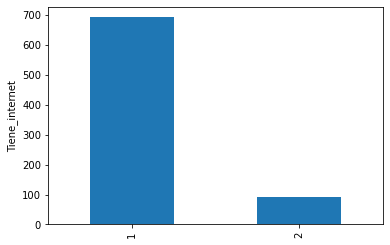

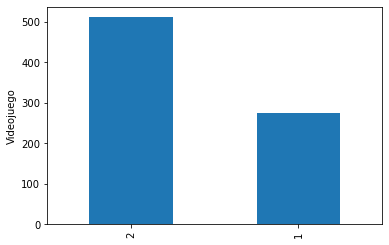

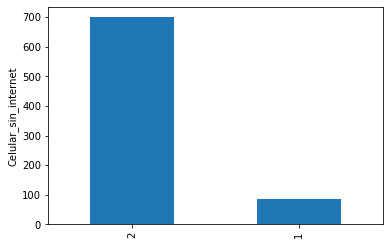

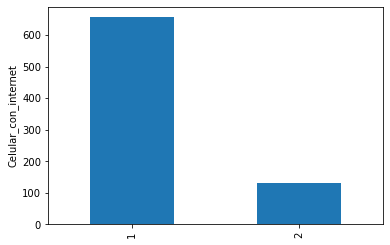

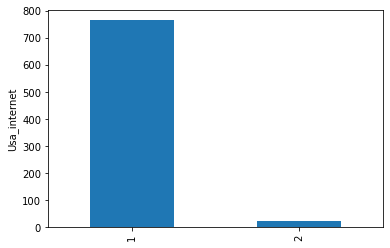

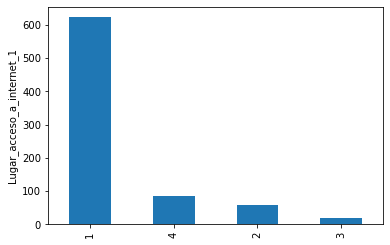

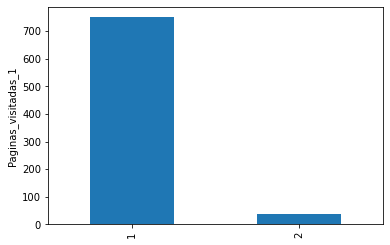

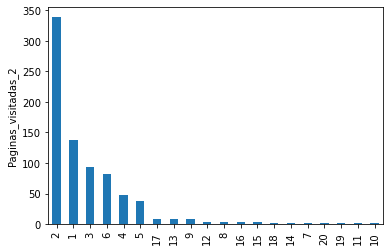

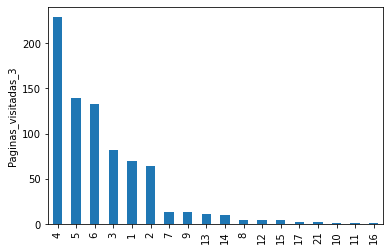

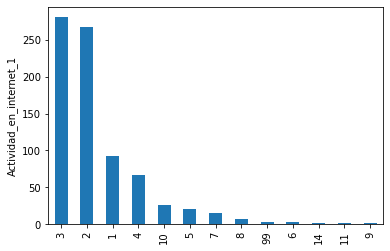

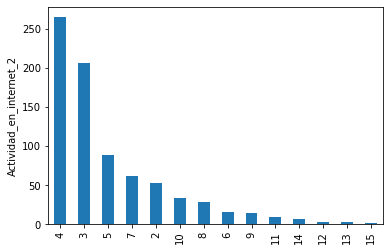

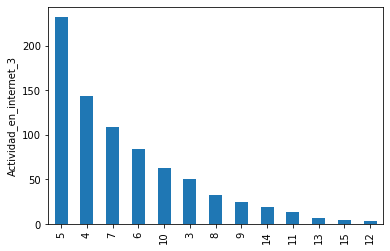

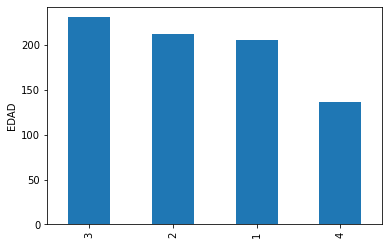

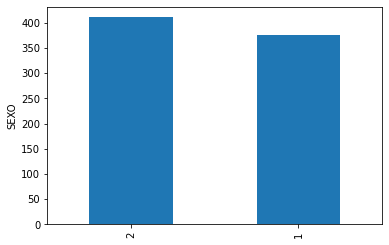

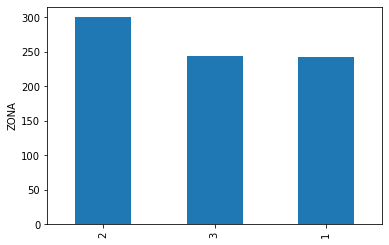

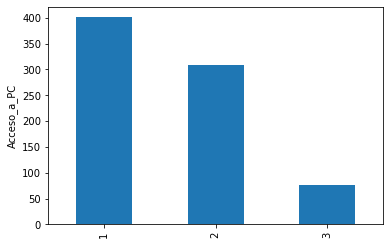

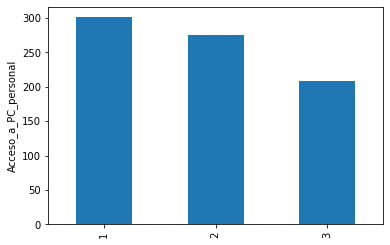

In [26]:
import matplotlib.pyplot as plt

for i in range(0, len(list(df.columns))):
    g = list(df.columns)[i]
    fig, ax = plt.subplots()
    df[list(df.columns)[i]].value_counts().plot(ax=ax, kind='bar')
    plt.ylabel(g)  

## Relación entre variables

In [27]:
df[["ZONA", "Acceso_a_PC"]].groupby(["ZONA"]).mean()

,Acceso_a_PC
ZONA,
1,1.471074
2,1.580000
3,1.713115


In [28]:
# Aqui vemos que el acceso a internet va disminuyendo a medida que nos aproxiamos al sur de la ciudad

zona_vs_internet = pd.crosstab(df["ZONA"], df["Tiene_internet"])
zona_vs_internet["Porcentaje"] = 100*zona_vs_internet[1]/(zona_vs_internet[2]+zona_vs_internet[1])

In [29]:
zona_vs_internet

Tiene_internet,1,2,Porcentaje
ZONA,,,
1,232,10,95.867769
2,265,35,88.333333
3,196,48,80.327869


In [30]:
# Aqui vemos hombres y mujeres visitan aproximadamente en igual cantidad las mismas paginas webs,
# siendo las redes sociales las mas consumidas

sexe_vs_web = pd.crosstab(df["SEXO"], df["Paginas_visitadas_1"])


In [31]:
sexe_vs_web

Paginas_visitadas_1,1,2
SEXO,,
1,353,22
2,397,14


In [35]:
zona_vs_pc = pd.crosstab(df["ZONA"], df["Acceso_a_PC"])
zona_vs_pc["Porcentaje"] = 100*zona_vs_pc[3]/(zona_vs_pc[2]+zona_vs_pc[1]+zona_vs_pc[3])

zona_vs_pc

Acceso_a_PC,1,2,3,Porcentaje
ZONA,,,,
1,134,102,6,2.479339
2,154,118,28,9.333333
3,113,88,43,17.622951


In [38]:
zona_vs_lugar = pd.crosstab(df["ZONA"], df["Lugar_acceso_a_internet_1"])
zona_vs_lugar["Porcentaje"] = 100*zona_vs_lugar[4]/(zona_vs_lugar[4]+ zona_vs_lugar[2]+zona_vs_lugar[1]+zona_vs_lugar[3])

zona_vs_lugar

Lugar_acceso_a_internet_1,1,2,3,4,Porcentaje
ZONA,,,,,
1,213,12,1,16,6.611570
2,240,25,10,25,8.333333
3,170,21,7,46,18.852459


In [33]:
edad_vs_web = pd.crosstab(df["EDAD"], df["Paginas_visitadas_1"])
edad_vs_web["Porcentaje"] = 100*edad_vs_web[1]/(edad_vs_web[2]+edad_vs_web[1])

edad_vs_web

Paginas_visitadas_1,1,2,Porcentaje
EDAD,,,
1,198,8,96.116505
2,205,7,96.698113
3,217,14,93.939394
4,130,7,94.890511


In [34]:
# A mayor edad, la tenencia de videojuegos disminuye
edad_vs_videojuego = pd.crosstab(df["EDAD"], df["Videojuego"])
edad_vs_videojuego["Porcentaje"] = 100*edad_vs_videojuego[1]/(edad_vs_videojuego[2]+edad_vs_videojuego[1])
edad_vs_videojuego

Videojuego,1,2,Porcentaje
EDAD,,,
1,97,109,47.087379
2,79,133,37.264151
3,67,164,29.004329
4,32,105,23.357664


## Conclusiones:

La muestra esta distribuida uniformemente en edad, sexo y zona pero son muy pocos datos como para hacer una buen análisis de la situación. Mas alla de eso, se observa:
- Marcada relacion entre la zona en la que habita (comunas del norte, centro y sur de CABA) con el acceso a tecnologias como internet, celular o computadora personal. 
- Mujeres y hombres suelen respetar las mismas tendencias segun su edad en cuanto a las paginas web que visitan como primera opcion. 
- El % de tenencia de consola disminuye a medida que se crece en edad. 
- Las actividaded mas realizadas en internet son chatear > correo electronico > bajar software. 
- Las paginas mas visitadas son: Google > Facebook > Gmail. 
- Solo el 4% de quienes viven en zona norte no tiene acceso a internet, mientras que en zona sur el 20% no tiene acceso a internet.
- El 2% de quienes viven en zona norte no tiene acceso a una computadora
- El 9% de quienes viven en zona centro no tiene acceso a una computadora
- El 17% de quienes viven en zona sur no tiene acceso a una computadora
- El 6% en zona norte no puede conectarse a internet ni desde su casa ni trabajo ni casa de familiar o amigo
- El 8% en zona centro no puede conectarse a internet ni desde su casa ni trabajo ni casa de familiar o amigo
- El 18% en zona sur no puede conectarse a internet ni desde su casa ni trabajo ni casa de familiar o amigo

